In [1]:
# import dependencies
#Load and inspect images using the Python Imaging Library (PIL)
from PIL import Image
# import os
import numpy as np
#import cv2
# from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# read y labels for images from csv file
y_original_df = pd.read_csv("../Data/y_labels.csv", header=None,names=['y_labels'])
# display 1st 5 values
y_original_df.head()

,y_labels
0,Benign
1,Benign
2,Benign
3,Benign
4,Benign


In [3]:
# importing pickle file
path = '../Data/x-ray.pkl'
with open(path, 'rb') as file:
    imgs = pickle.load(file)

In [4]:
# list values contained in imgs
imgs

[array([[0.9254902 , 0.9254902 , 0.9254902 , ..., 0.92156863, 0.92156863,
         0.92156863],
        [0.9254902 , 0.9254902 , 0.9254902 , ..., 0.92156863, 0.92156863,
         0.92156863],
        [0.9254902 , 0.9254902 , 0.9254902 , ..., 0.92156863, 0.92156863,
         0.92156863],
        ...,
        [0.92156863, 0.92156863, 0.92156863, ..., 0.92156863, 0.92156863,
         0.92156863],
        [0.9254902 , 0.9254902 , 0.9254902 , ..., 0.92156863, 0.92156863,
         0.92156863],
        [0.9254902 , 0.9254902 , 0.9254902 , ..., 0.92156863, 0.92156863,
         0.92156863]], dtype=float32),
 array([[0.9882353, 0.9882353, 0.9882353, ..., 0.9843137, 0.9843137,
         0.9843137],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9843137, 0.9843137,
         0.9843137],
        [0.9882353, 0.9882353, 0.9882353, ..., 0.9843137, 0.9843137,
         0.9843137],
        ...,
        [0.9843137, 0.9843137, 0.9843137, ..., 0.9843137, 0.9843137,
         0.9843137],
        [0.9843137, 0

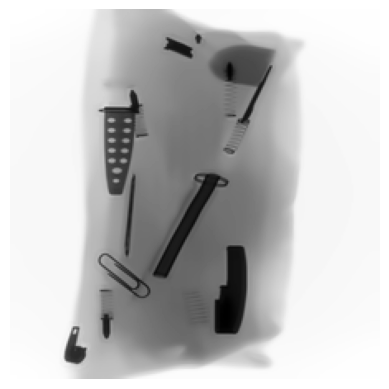

In [5]:
# Display the first resized image to verify pickle file
plt.imshow(imgs[0], cmap='gray')  
plt.axis('off')
plt.show()

In [6]:
# Check to see if all images have the same shape.  Drop images of inconsistent shape
new_img = []
y_df = y_original_df.copy()
# Set counters to 0
i=0
# Iterate over the images  
for img in imgs:
#    print(f'image number {i}')
    # check to see if images has correct shape
    if img.shape != imgs[0].shape:
        print(f"image {i} has shape {img.shape} expecting {img[0].shape}")
        y_df = y_df.drop(index=i)
    else:
        new_img.append(img)
    i = i+1  

In [7]:
# define independent and dependent
X = np.array(new_img)

# Split the training dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y_df['y_labels']), test_size=0.2, random_state=42)

In [8]:
def reshape(img):
    # For grayscale images, the "channels" dimension must be added
    # Add a channel dimension for grayscale images
    reshaped_image_array = np.expand_dims(img, axis=-1)

    #Add batch dimension
    reshaped_image_array = np.expand_dims(reshaped_image_array, axis=0)
    
    # View the shape
    #reshaped_image_array.shape
    return reshaped_image_array

In [9]:
def augment(img):
    #call function to reshape the image
    reshaped_image_array = reshape(img)
        
    # Create the ImageDataGenerator object with desired augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    # Generate augmented images
    augmented_images = []
    
    for _ in range(5):  # Augment the image 5 times for variety
        augmented_image = next(datagen.flow(reshaped_image_array, batch_size=1))[0]
        augmented_images.append(augmented_image)

    # uncomment to show images
    # Visualize the original and augmented images
#     plt.figure(figsize=(12, 6))
#     for i in range(6):
#         plt.subplot(2, 3, i + 1)
#         if i == 0:
#             plt.imshow((reshaped_image_array[0, :, :, 0]*255).astype('uint8'), cmap='gray')  # Original image
#         else:
#             plt.imshow((augmented_images[i - 1][:, :, 0]*255).astype('uint8'), cmap='gray')
#         plt.axis('off')

    #display images
   # plt.show()
    # return reshaped images
    return augmented_images

In [10]:
# check augmentation
augment(imgs[0])

[array([[[0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         ...,
         [0.9098039 ],
         [0.9098039 ],
         [0.9098039 ]],
 
        [[0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         ...,
         [0.9098039 ],
         [0.9092663 ],
         [0.9078895 ]],
 
        [[0.9254902 ],
         [0.9254902 ],
         [0.9254902 ],
         ...,
         [0.90629745],
         [0.90588236],
         [0.90588236]],
 
        ...,
 
        [[0.9137255 ],
         [0.9137255 ],
         [0.9137255 ],
         ...,
         [0.9137255 ],
         [0.9137255 ],
         [0.9137255 ]],
 
        [[0.9137255 ],
         [0.9137255 ],
         [0.9137255 ],
         ...,
         [0.9137255 ],
         [0.9137255 ],
         [0.9137255 ]],
 
        [[0.9145252 ],
         [0.915902  ],
         [0.9172788 ],
         ...,
         [0.9137255 ],
         [0.9137255 ],
         [0.9137255 ]]], dtype=float32),
 array([[[0.90588236],
         [0.90588

In [11]:
# Create an empty list for both X and y augmentations
X_train_aug = []
y_train_aug = []
# Loop through each image in the training data
for i in range(len(X_train)):
    # Select the image and its y label
    imgX = X_train[i]
    label = y_train[i]
    
    # Add a channel dimension for grayscale images
    imgX = augment(imgX)
    
    # Use a loop to create 5 new images and append augmented images 
    X_train_aug.extend(imgX) 
    for j in range(5):
        y_train_aug.append(label)

# Print the lengths of both augmented sets to ensure they are the same length
print(f'length of X training data {len(X_train_aug)} and y training data {len(y_train_aug)}')

length of X training data 13540 and y training data 13540


In [12]:
# One hot encode the y datasets
y_encoder = OneHotEncoder(handle_unknown='ignore', 
                          sparse_output=False).fit(np.array(y_train_aug).reshape(-1, 1))
y_train_enc = y_encoder.transform(np.array(y_train_aug).reshape(-1, 1))
y1_encoder = OneHotEncoder(handle_unknown='ignore', 
                           sparse_output=False).fit(np.array(y_test).reshape(-1, 1))
y_test_enc = y1_encoder.transform(np.array(y_test).reshape(-1, 1))

In [13]:
# # Convert X values to numpy arrays
X_train_np = np.array(X_train_aug)
X_test_np = np.array(X_test)


In [22]:
# Save the y values to a text file
np.savetxt('../Data/Y_Labels/y_training_labels.txt', y_train_enc, fmt='%s')
np.savetxt('../Data/Y_Labels/y_testing_labels.txt', y_test_enc, fmt='%s')

In [15]:
# create path for training pickle file
path = '../Data/training_xray_images.pkl'

# Open a new file named 'img.pkl' with write permission
with open(path, 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(X_train_aug, file)

In [16]:
# create path for testing pickle file
path_test ='../Data/testing_xray_images.pkl'

# Open a new file named 'img.pkl' with write permission
with open(path_test, 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(X_test, file)